**Final Exam Project**



# 1. Data Cleaning


The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’.
Therefore, the first step is to “clean” the data. A procedure that prepares the Twitter
data for analysis by satisfying the requirements below is designed. The same pipeline is used
for both datasets.

• All emojis are removed.

• All URLs are removed.  

• All characters in the text are in lowercase.  

• All stop words are removed. Be clear in what you consider as a stop word.

• All punctuations are removed.

## 1.1 Import two datasets

In [ ]:
import pandas as pd

data_sentiment = pd.read_csv('sentiment_analysis.csv')
data_canadian = pd.read_csv('Canadian_elections_2021.csv')

In [ ]:
# print sentiment analysis dataset
data_sentiment

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
# print Canadian elections dataset
data_canadian

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


## 1.2 Change all characters in the text to lower case

In [ ]:
data_sentiment['text'] = data_sentiment['text'].apply(str.lower)
data_canadian['text'] = data_canadian['text'].apply(str.lower)

## 1.3 Remove both emojis and URLs

In [ ]:
import re

def remove_emoji_url(data):
    # recognize emoji using regex
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)

    # remove emoji from the input
    result = re.sub(emoj, '', data)
    # remove URL from the input
    result = re.sub(r'http\S+', '', result)
    return result

In [ ]:
# remove emoji and url from the two datasets
data_sentiment['text'] = data_sentiment['text'].apply(remove_emoji_url)
data_canadian['text'] = data_canadian['text'].apply(remove_emoji_url)

## 1.4 Tokenize sentences

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# convert input sentences to list of tokens (words, number, punctuations, and etc)
data_sentiment['tokenized'] = data_sentiment['text'].apply(nltk.tokenize.word_tokenize)
data_canadian['tokenized'] = data_canadian['text'].apply(nltk.tokenize.word_tokenize)

## 1.5 Remove stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# get stop words from nltk
stopwords = set(stopwords.words('english'))

def remove_stopwords(tokenized_sentence):
    # remove stop words from the input
    return [word for word in tokenized_sentence if word not in stopwords]

In [ ]:
# remove stop words from the two datsets
data_sentiment['tokenized'] = data_sentiment['tokenized'].apply(remove_stopwords)
data_canadian['tokenized'] = data_canadian['tokenized'].apply(remove_stopwords)

## 1.6 Remove punctuations

In [ ]:
# the list of punctuations
puncts = set('''!()-[]{};:'"\,<>./?@#$%^&*_~''')

def remove_punctuations(tokenized_sentence):
    # remove punctuations from the input sentence
    return [word for word in tokenized_sentence if word not in puncts]

In [ ]:
# remove punctuations from the two datasets
data_sentiment['tokenized'] = data_sentiment['tokenized'].apply(remove_punctuations)
data_canadian['tokenized'] = data_canadian['tokenized'].apply(remove_punctuations)

# 2. Exploratory Analysis


A  procedure  that  determines  the  political  party  (Liberal,  Conservative,  New
Democratic Party (NDP), The People's Party of  Canada (PPC)) of a given tweet is designed and applied to all the tweets in the Canadian Elections dataset.

The keywords for the four political parties are:
1. Liberal: 'justin', 'trudeau', 'liberal', 'justintrudeau', 'lpc'
2. Conservative: 'erin', 'otoole', 'conservative', 'erinotoole', 'cpc'
3. New Democratic Party: 'jagmeet', 'singh', 'newdemocratic', 'democratic', 'ndp', 'jagmeetsingh'
4. The People's Party of Canada: 'maxime', 'bernier', 'peoplespca', 'ppc', 'maximebernier'

The keywords chosen for the four political parties are the names of the political parties and their abbreviations. The names of the leaders of the political parties are also included. For each sentence, the intersection of the tweet and the key word set of each party is calculated. A tweet is cosiderred to refer to a party if it mentions a key word of the party. This way, the political party of a given tweet can be determined. If more than one party is mentioned in a given tweet, the first party mentioned in the tweet is counted.

## 2.1 Recognize the political party of each tweet

In [ ]:
# keywords for each parties
keywords = {
    'Liberal': ['justin', 'trudeau', 'liberal', 'justintrudeau', 'lpc' ],
    'Conservertive': ['erin', 'otoole', 'conservative', 'erinotoole', 'cpc'],
    'NDP': ['jagmeet', 'singh', 'newdemocratic', 'democratic', 'ndp', 'jagmeetsingh'],
    'PPC': ['maxime', 'bernier', 'peoplespca', 'ppc', 'maximebernier'],
}

In [ ]:
def specify_party(tokenized_sentence):
    # recognize the political party for the given sentence
    for party in keywords:
        if set(keywords[party]).intersection(set(tokenized_sentence)):
            return party
    return None

In [ ]:
# recognize the political party for all sentences in the Canadian election dataset
data_canadian['party'] = data_canadian['tokenized'].apply(specify_party)

## 2.2 Plot the distribution of parties mentioned in tweets

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# count the number of tweets mentioned for each party
data_canadian['party'].value_counts()

Liberal          404
Conservertive    201
PPC               31
NDP               25
Name: party, dtype: int64

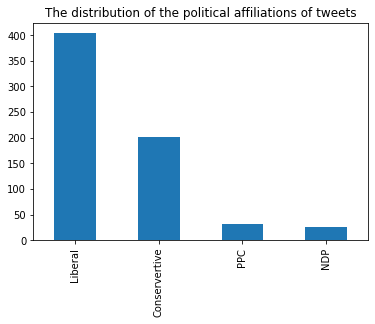

In [ ]:
plt.title('The distribution of the political affiliations of tweets')
data_canadian['party'].value_counts().plot(kind='bar')

What can you say about the distribution of the political affiliations of the tweets?

From the plot of the distribution of the political affiliations of the tweet, the liberal and conservative parties are the two major parties mentioned in the tweets. The liberal party is mentioned the most in the tweets. The PPC and NDP parties are mentioned the least, and the difference between their number of times mentioned is low. The number of times mentioned for the liberal and conservative parties is significantly higher than the New Democratic Party and the People's Party of Canada. This is a reasonable observation since they are Canada's top two main political parties, the liberal party currently form the government, and the conservative party is the Official Opposition.

## 2.3 Plot the distribution of positive / negative for each dataset

Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that
visualizes  some  aspect  of  the  generic  tweets  in  sentiment_analysis.csv  and  another
figure for the 2021 Canadian Elections tweets.

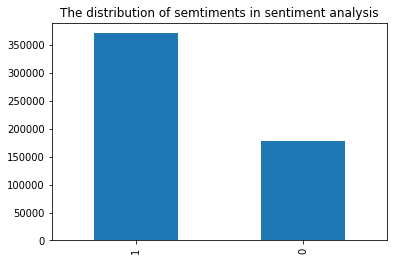

In [ ]:
plt.title('The distribution of semtiments in sentiment analysis')
data_sentiment['label'].value_counts().plot(kind='bar')

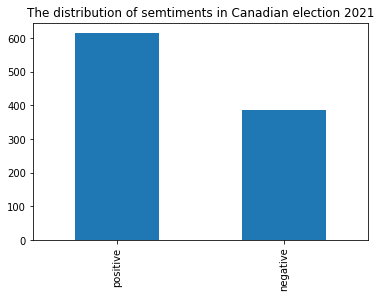

In [ ]:
plt.title('The distribution of semtiments in Canadian election 2021')
data_canadian['sentiment'].value_counts().plot(kind='bar')

## 2.4 Plot word cloud for each dataset / sentiment

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# get positive and negative sentiments of sentiment analysis
pos_data_sentiment = data_sentiment[data_sentiment['label'] == 1]
neg_data_sentiment = data_sentiment[data_sentiment['label'] == 0]

In [ ]:
pos_words_sentiment = []
from tqdm import tqdm
for words in tqdm(pos_data_sentiment['tokenized']):
    pos_words_sentiment.extend(words)

100%|██████████| 371341/371341 [00:00<00:00, 882515.92it/s]


In [ ]:
neg_words_sentiment = []
from tqdm import tqdm
for words in tqdm(neg_data_sentiment['tokenized']):
    neg_words_sentiment.extend(words)

100%|██████████| 179050/179050 [00:00<00:00, 706826.88it/s]


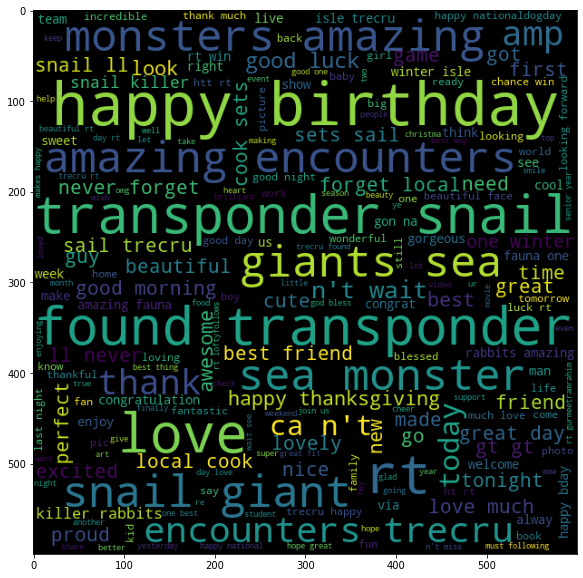

In [ ]:
# word cloud of positive sentiments
wordcloud = WordCloud(width=600, height=600).generate(' '.join(pos_words_sentiment))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)

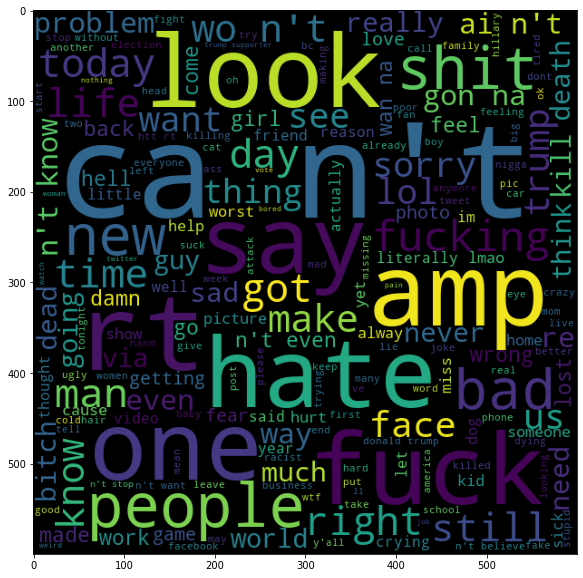

In [ ]:
# word cloud of negative sentiments
wordcloud = WordCloud(width=600, height=600).generate(' '.join(neg_words_sentiment))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)

In [ ]:
# get positive and negative sentiments of Canadian elections 2021
pos_data_canadian = data_canadian[data_canadian['sentiment'] == 'positive']
neg_data_canadian = data_canadian[data_canadian['sentiment'] == 'negative']

pos_words_canadian = []
from tqdm import tqdm
for words in tqdm(pos_data_canadian['tokenized']):
    pos_words_canadian.extend(words)

neg_words_canadian = []
from tqdm import tqdm
for words in tqdm(neg_data_canadian['tokenized']):
    neg_words_canadian.extend(words)

100%|██████████| 387/387 [00:00<00:00, 609536.48it/s]


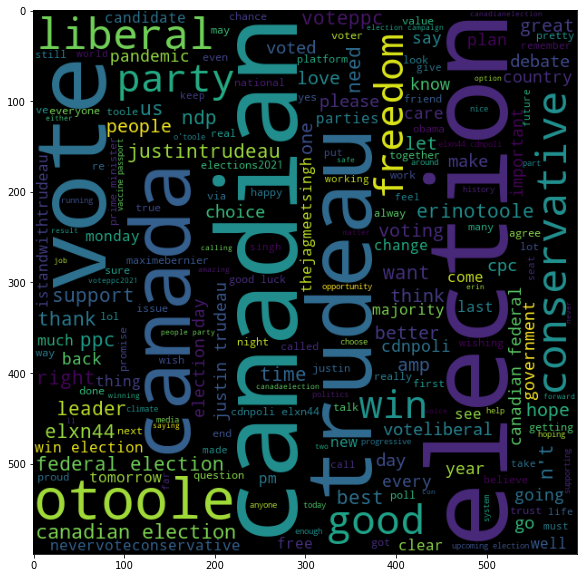

In [ ]:
# word cloud of positive sentiments
wordcloud = WordCloud(width=600, height=600).generate(' '.join(pos_words_canadian))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)

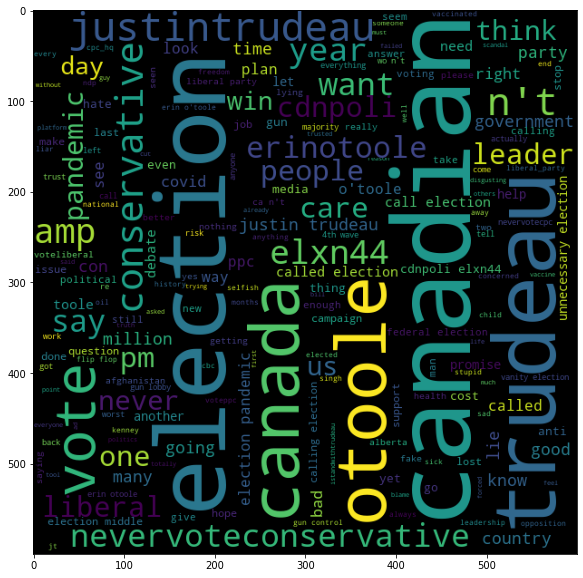

In [ ]:
# word cloud of negative sentiments
wordcloud = WordCloud(width=600, height=600).generate(' '.join(neg_words_canadian))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)

## 2.5 Discussion of findings


From the distribution plots of sentiments in the sentiment analysis and Canadian elections 2021 dataset, the positive tweets are more than the negative tweets. Therefore, this may show that people tend to post more tweets with positive sentiments.

The ratios of positive tweets in the two datasets are similar. It shows that people may present similar emotions to election events as usual. So, it is neither a positive event nor a negative event overall.

For the sentiment analysis dataset, the word cloud plots of positive and negative sentiments are generated. The most mentioned positive sentiment words are 'happy birthday,' 'amazing encounters,' 'found transponder,' 'love,' and 'sea monster.' The most mentioned negative sentiment words are 'bad,' 'can't,' 'hate,' 'won't,' and a few curse words.

For the Canadian election dataset, the word cloud plots of positive and negative sentiments are generated. The most mentioned positive sentiment words are 'liberal', 'freedom', 'canadian', 'trudeau', 'otoole'. The most mentioned negative sentiment words are 'election', 'canadian', 'otoole', 'trudeau', 'conservative'. They are the names of party and party leaders.

It can be seen that there is a giant gap between the words in use between the two datasets. The word cloud plots of the Canadian election dataset have a clear distinction compared to the sentiment analysis dataset. It may cause a problem for a sentiment analysis model which is trained only on the sentiment analysis dataset because the most emotional words in the Canadian election dataset may rarely show in the training dataset, and vice versa. The positive and negative words are very different for the sentiment analysis dataset, while for the Canadian election dataset, the positive and negative words overlap a lot. These words are neutral and frequently used in election-related tweets.

# 3. Sentiment Classification - Model implementation and tuning

## 3.1 Machine learning models

### 3.1.1 Prepare data using TF-IDF
  • Set max_features = 5000

In [ ]:
# join words into one string
data_sentiment['clean'] = data_sentiment['tokenized'].apply(lambda words: ' '.join(words))

In [ ]:
# convert sentences into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_sentiment['clean'])

### 3.1.2 Split train and test

Split the generic tweets randomly into training data (80%) and test data (20%).

The target variable is the sentiment value ('label'), which is either positive or negative.  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X, data_sentiment['label'], test_size=.2)

### 3.1.3 Train seven classification algorithms on the training data
1. Logistic regression
2. K-NN
3. Naive Bayes
4. SVM
5. Decision trees
6. Random Forest
7. XGBoost

In [ ]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [ ]:
# seven classification algorithms
models = {
    'logistic regression': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'naive bayes': MultinomialNB(),
    'svm': LinearSVC(),
    'decision tree': DecisionTreeClassifier(),
    'random forest': RandomForestClassifier(),
    'xgboost': xgboost.sklearn.XGBClassifier(),
}

In [ ]:
# Train algorithms on the training data from generic tweets
for model_name in models:
    model = models[model_name]
    model.fit(X_sentiment_train, y_sentiment_train)
    print(model_name, 'trained successfully.')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


logistic regression trained successfully.
knn trained successfully.
naive bayes trained successfully.
svm trained successfully.
decision tree trained successfully.
random forest trained successfully.
xgboost trained successfully.


### 3.1.4 Evaluate each model on the test data to obtain accuracy value

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy values of the seven models
accuracy = {}

for model_name in models:
    model = models[model_name]
    y_pred = model.predict(X_sentiment_test)
    accuracy[model_name] = accuracy_score(y_pred, y_sentiment_test)
    print('Accuracy of', model_name, 'is', accuracy[model_name])

Accuracy of logistic regression is 0.967641421161166
Accuracy of knn is 0.7892331870747372
Accuracy of naive bayes is 0.926679929868549
Accuracy of svm is 0.9684590157977453
Accuracy of decision tree is 0.9451757374249403
Accuracy of random forest is 0.9586569645436459
Accuracy of xgboost is 0.8626441010546971


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

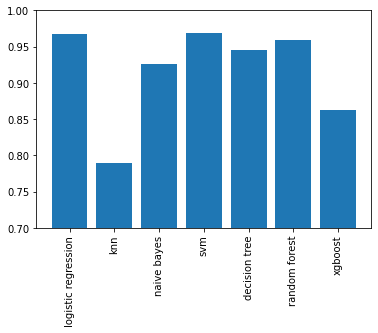

In [ ]:
# plot of the accuracy values
plt.bar(accuracy.keys(), accuracy.values())
plt.ylim(0.7, 1)
plt.xticks(rotation='vertical')

From the above results of the accuracy values on the seven models, the model with the highest accuracy is the SVM model.

The logistic regression, naive Bayes, decision trees, and random forest models all performed well on the test data, with accuracy values over 90%. The k-NN and xgboost models don't perform as well as the models mentioned before. The k-NN model has the worst performance.

The two linear models, logistic regression and linear SVM, achieve the top two performances. It shows the linear nature of the sentiment analysis problem.

## 3.2 Deep learning model

### 3.2.1 Prepare data using Bag of Words


 • Set max_features = 5000

In [ ]:
# convert sentences into vectors using word counting
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_sentiment['clean'])

### 3.2.2 Split data into training, validation and test data

Split the generic tweets into training data (60%), validation data (20%) and test data (20%).

In [ ]:
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X, data_sentiment['label'], test_size=.4)
X_sentiment_dev, X_sentiment_test, y_sentiment_dev, y_sentiment_test = train_test_split(
    X_sentiment_test, y_sentiment_test, test_size=.5)

### 3.2.3 Define and train model to perform the sentiment classification task

In [ ]:
# import libraries
import torch
from torch import nn
from torch import optim

In [ ]:
# MLP model definition
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5000, 512),        # first layer
            nn.ReLU(),                   # activation function - ReLU
            nn.Linear(512, 1)            # second layer
        )

    def forward(self, x):
        return self.model(x)

# print the structure of the model
model = Model()
model

Model(
  (model): Sequential(
    (0): Linear(in_features=5000, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)

### 3.2.4 Tune two hyperparameters using grid search


The two hyperparameters, epochs and batch size, are tuned using grid search.

In [ ]:
import random
import numpy as np

loss = nn.BCEWithLogitsLoss()

best_acc = 0.
best_param = None
best_model = None
# try different parameters: n_epochs and batch_size
for n_epochs in [2, 4]:
  for batch_size in [1024, 2048]:
    # initialize the model
    model = Model()
    # use the Adam optimizer
    optimizer = optim.Adam(model.parameters())
    # train the model
    for epoch in range(n_epochs):
      # shuffle the training data
      indices = list(range(X_sentiment_train.shape[0]))
      random.shuffle(indices)
      # iterate over the training data
      for i in range(0, len(indices), batch_size):
        # get current data slice
        cur_indices = indices[i : i + batch_size]
        cur_X = torch.Tensor(X_sentiment_train[cur_indices].todense())
        cur_y = torch.Tensor(y_sentiment_train.iloc[cur_indices].to_numpy()).reshape(-1, 1)
        # predict
        logit = model(cur_X)
        # train one step
        optimizer.zero_grad()
        loss(logit, cur_y).backward()
        optimizer.step()

    # validate the model using validation set
    indices = list(range(X_sentiment_dev.shape[0]))
    y_pred_dev = []
    # iterate over the validation set
    for i in range(0, len(indices), batch_size):
      # get current data slice
      cur_indices = indices[i : i + batch_size]
      cur_X = torch.Tensor(X_sentiment_dev[cur_indices].todense())
      cur_y = torch.Tensor(y_sentiment_dev.iloc[cur_indices].to_numpy()).reshape(-1, 1)
      # predict
      logit = model(cur_X)
      cur_y = (logit > 0).numpy()
      y_pred_dev.append(cur_y)
    # combine all predictions
    y_pred_dev = np.concatenate(y_pred_dev)
    # get the accuracy on the validation set
    acc = accuracy_score(y_pred_dev, y_sentiment_dev)
    print('n_epochs', n_epochs, 'batch_size', batch_size, 'accuracy', acc)
    # if get best performance, record
    if acc > best_acc:
      best_acc = acc
      best_param = {'n_epochs': n_epochs, 'batch_size': batch_size}
      best_model = model

n_epochs 2 batch_size 1024 accuracy 0.966887116408365
n_epochs 2 batch_size 2048 accuracy 0.967223241701339
n_epochs 4 batch_size 1024 accuracy 0.967731971874489
n_epochs 4 batch_size 2048 accuracy 0.9668416940714766


In [ ]:
print('Best hyperparameters are', best_param)

Best hyperparameters are {'n_epochs': 4, 'batch_size': 1024}


The two hyperparameters, epochs and batch size, are tuned using grid search. The epochs for grid search are 2 and 4, and the batch sizes for grid search are 1024 and 2048. The highest accuracy is achieved when epochs are 4 and batch size is 1024. Different epochs and batch sizes do not significantly impact the accuracy of the deep learning model.

### 3.2.5 Evaluate the best model on the test data to obtain accuracy value

In [ ]:
indices = list(range(X_sentiment_test.shape[0]))
y_pred_test = []
for i in range(0, len(indices), batch_size):
  # get current data slice
  cur_indices = indices[i : i + batch_size]
  cur_X = torch.Tensor(X_sentiment_test[cur_indices].todense())
  cur_y = torch.Tensor(y_sentiment_test.iloc[cur_indices].to_numpy()).reshape(-1, 1)
  # predict
  logit = best_model(cur_X)
  cur_y = (logit > 0).numpy()
  y_pred_test.append(cur_y)
# combine all predictions
y_pred_test = np.concatenate(y_pred_test)
# get the accuracy value
acc = accuracy_score(y_pred_test, y_sentiment_test)
print('The accuracy on the test set is', acc)

The accuracy on the test set is 0.9675051553884029


The accuracy on the test set is 0.9675051553884029, which is the performance of the deep learning model with the best hyperparameters. Its accuracy value is similar to the SVM and logistic regression models.

## 3.3 Evaluate the trained model with the best performance on the Canadian Elections data


In [ ]:
data_canadian['clean'] = data_canadian['tokenized'].apply(lambda words: ' '.join(words))
X_canadian = vectorizer.transform(data_canadian['clean'])
y_canadian = data_canadian['sentiment'] == 'positive'

In [ ]:
indices = list(range(X_canadian.shape[0]))
y_pred_canadian = []
for i in range(0, len(indices), batch_size):
  # get current data slice
  cur_indices = indices[i : i + batch_size]
  cur_X = torch.Tensor(X_canadian[cur_indices].todense())
  cur_y = torch.Tensor(y_canadian.iloc[cur_indices].to_numpy()).reshape(-1, 1)
  # predict
  logit = best_model(cur_X)
  cur_y = (logit > 0).numpy()
  y_pred_canadian.append(cur_y)
# combine all predictions
y_pred_canadian = np.concatenate(y_pred_canadian)
# get the accuracy value
acc = accuracy_score(y_pred_canadian, y_canadian)
print('The accuracy on the Canadian dataset is', acc)

The accuracy on the Canadian dataset is 0.7235528942115769


The Deep Learning model (MLP) is chosen as the best model. Though the SVM model achieves comparable performance to MLP, the deep learning model is preferred because it leverages only 60% of data, which is much less than 80% which is used by the SVM model, to achieve the performance.

The deep learning model achieves an accuracy value of 0.7235528942115769 on the prediction of the sentiment labeled in the Canadian elections data. The performance significantly drops from the accuracy of 0.9675 on the sentiment analysis dataset. However, given the giant gap between the distribution of words in the two datasets, its performance is acceptable.

## 3.4 Propose two other evaluation metrics to evaluate the models

In [ ]:
from sklearn.metrics import f1_score
# macro f1 score
macro_f1 = f1_score(y_pred_canadian, y_canadian, average='macro')
print('The macro f1 score on the Canadian dataset is', macro_f1)
# weighted f1 score
weighted_f1 = f1_score(y_pred_canadian, y_canadian, average='weighted')
print('The weighted f1 score on the Canadian dataset is', weighted_f1)

The macro f1 score on the Canadian dataset is 0.7231754327347439
The weighted f1 score on the Canadian dataset is 0.7216043768581962


Additional two metrics to evaluate the models: weighted F1 and Macro F1.

For each label, the F1 score is basically the harmonic average of recall and precision score, so it measures the balanced recall and precision performance of the model. Macro F1 score and weighted F1 score are two averaging approaches for multi-label tasks (two labels in this task).

 - Macro F1 score calculates the F1 score for each label and finds their unweighted mean.
 - Weighted F1 score calculates the F1 score for each label, finds their average weighted and takes label imbalance into account.

The macro and weighted f1 scores for the model are both over 0.70, which is good.



## 3.5 Choose the model that has the best performance and visualize sentiment prediction results and the true sentiment for each of the 4 parties

### 3.5.1 Visualization of results

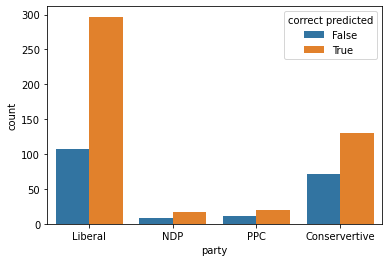

In [ ]:
# plot of the correctness of sentiment prediction for each party
import seaborn as sns
elections_df = pd.DataFrame({
    'party': data_canadian['party'],
    'correct predicted': (y_canadian.to_numpy().reshape(-1) == y_pred_canadian.reshape(-1))
})
sns.countplot(x='party', hue='correct predicted', data=elections_df)

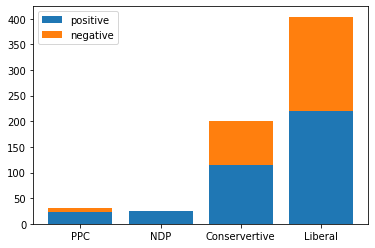

In [ ]:
# plot of the sentiment values for each of the 4 parties
import seaborn as sns
parties = list(party for party in set(data_canadian['party']) if party is not None)
positive_count = {party: 0 for party in parties}
negative_count = {party: 0 for party in parties}
elections_df = pd.DataFrame({
    'party': data_canadian['party'],
    'positive': y_canadian
})
for i, row in elections_df.iterrows():
  party, positive = row['party'], row['positive']
  if party is not None:
    if positive:
      positive_count[party] += 1
    else:
      negative_count[party] += 1
plt.bar(parties, list(positive_count.values()), label='positive')
plt.bar(parties, list(negative_count.values()), bottom=list(positive_count.values()), label='negative')
plt.legend()

### 3.5.2 Discussion of findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value.

The first plot in 3.5.1 is the plot of the correctness of sentiment prediction for each of the four parties. The second plot in 3.5.2 is the plot of the sentiment values for each of the four parties.

For the first plot, the model made more correct predictions on the sentiment than the incorrect predictions on all of the four parties. The ratios of correct predictions for the four parties don't differ much.

NLP analytics based on tweets is helpful for political parties during election campaigns since it can recognize voters' attitudes to different parties. The model's accuracy is more than 70%, so it is efficient to forecast the result of the election from social media information.

For the second plot, based on the sentiment value, how each party is viewed in the public eye can be observed. Since the liberal and conservative parties are the two largest parties, the public expresses more opinions about them. Their positive and negative sentiments are almost equal, meaning that the public's views on them are divided into support and opposition evenly. For the PPC and NDP parties, since they are the smaller parties and the number of tweets mentioned is much lower, their sentiments are almost all positive.

### 3.5.3 Suggestion on one way that can improve the accuracy of this model


The performance of the deep learning MLP model could be further improved by tuning more aspects of it. For example, the depth and width of the model can be tuned. The depth and width of the deep learning MLP model could significantly influence the model's capacity. The model's performance may be improved by increasing the depth of the model or increasing the width of hidden layers of the model.

# 4. Negative Reason Classification - Model implementation and tuning

## 4.1 Prepare data using TF-IDF
  • Set max_features = 5000

In [ ]:
# some data pieces don't come with negative reason
data_reason = data_canadian[['text', 'clean', 'negative_reason']].dropna()

In [ ]:
# convert sentences into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_reason['clean'])

## 4.2 Split train and test for the negative Canadian elections tweets

Split the negative Canadian elections tweets into training data (70%) and test data (30%).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# build mapping from reasons to numbers
reason_to_number = {}
number_to_reason = {}
for i, reason in enumerate(set(data_reason['negative_reason'])):
  reason_to_number[reason] = i
  number_to_reason[i] = reason

# convert reasons to integer numbers
data_reason['negative_reason_number'] = data_reason['negative_reason'].apply(lambda reason: reason_to_number[reason])

In [ ]:
# split the dataset into train and test sets
X_reason_train, X_reason_test, y_reason_train, y_reason_test = train_test_split(
    X, data_reason['negative_reason_number'], test_size=.3)

## 4.3 Compare different models

### 4.3.1 Machine learning models

In [ ]:
# seven models
models = {
    'logistic regression': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'naive bayes': MultinomialNB(),
    'svm': LinearSVC(),
    'decision tree': DecisionTreeClassifier(),
    'random forest': RandomForestClassifier(),
    'xgboost': xgboost.sklearn.XGBClassifier(),
}

In [ ]:
# Train algorithms on the training data
for model_name in models:
  model = models[model_name]
  model.fit(X_reason_train, y_reason_train)
  y_pred = model.predict(X_reason_test)
  # accuracy
  acc = accuracy_score(y_pred, y_reason_test)
  print('Using', model_name, ', accuracy is', acc)

Using logistic regression , accuracy is 0.5213675213675214
Using knn , accuracy is 0.48717948717948717
Using naive bayes , accuracy is 0.4700854700854701
Using svm , accuracy is 0.6068376068376068
Using decision tree , accuracy is 0.4444444444444444
Using random forest , accuracy is 0.5811965811965812
Using xgboost , accuracy is 0.6068376068376068


The machine learning model with highest accuracy is the SVM and xgboost model. The logistic regression and random forest models have similar better performance than the k-NN, naive Bayes and decision tree models.

### 4.3.2 Deep learning model

In [ ]:
# MLP model definition
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(min(5000, X.shape[-1]), 512),     # first layer
            nn.ReLU(),                                  # activation function - ReLU
            nn.Linear(512, len(reason_to_number)),      # second layer
            nn.LogSoftmax()                             # convert logit to probability
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
import random
import numpy as np

import warnings
warnings.filterwarnings('ignore')

loss = nn.NLLLoss()

best_acc = 0.
n_epochs = 4
batch_size = 1024

# initialize the model
model = Model()
# use the Adam optimizer
optimizer = optim.Adam(model.parameters())
for epoch in range(n_epochs):
  # shuffle the training data
  indices = list(range(X_reason_train.shape[0]))
  random.shuffle(indices)
  # iterate over the training data
  for i in range(0, len(indices), batch_size):
    # get current data slice
    cur_indices = indices[i : i + batch_size]
    cur_X = torch.Tensor(X_reason_train[cur_indices].todense())
    cur_y = torch.Tensor(y_reason_train.iloc[cur_indices].to_numpy()).reshape(-1, 1)
    # predict
    logit = model(cur_X)
    # train one step
    optimizer.zero_grad()
    loss(logit, cur_y.reshape(-1).long()).backward()
    optimizer.step()
# validation
indices = list(range(X_reason_test.shape[0]))
y_pred_test = []
for i in range(0, len(indices), batch_size):
  cur_indices = indices[i : i + batch_size]
  cur_X = torch.Tensor(X_reason_test[cur_indices].todense())
  logit = model(cur_X)
  cur_y = logit.detach().numpy().argmax(axis=-1)
  y_pred_test.append(cur_y)
y_pred_test = np.concatenate(y_pred_test)
# accuracy
acc = accuracy_score(y_pred_test, y_reason_test)
print('n_epochs', n_epochs, 'batch_size', batch_size, 'accuracy', acc)

n_epochs 4 batch_size 1024 accuracy 0.4358974358974359


The epochs and batch size used for the deep learning model is the best hyperparameters tuned in 3.2.4. The accuracy of the model is 0.4358974358974359, which is the worst performance compared to the machine learning models.

### 4.4 Tune hyper-parameters

The SVC model is chosen since its accuracy is relatively higher. Its C, the regularization parameter, and kernel function are tuned.

In [ ]:
from sklearn.svm import SVC

In [ ]:
best_acc = 0
best_params = None
best_model = None

# tune C and kernel
for C in [.01, .1, 1, 10, 100]:
    for kernel in ['linear', 'poly', 'rbf']:
      # train the SVM model
      model = SVC(C=C, kernel=kernel)
      model.fit(X_reason_train, y_reason_train)
      # test the model
      y_pred = model.predict(X_reason_test)
      # get the accuracy
      acc = accuracy_score(y_pred, y_reason_test)
      print('With C =', C, ', kernel =', kernel, ', accuracy =', acc)
      # if get best performance, record
      if acc > best_acc:
          best_params = {'C': C, 'kernel': kernel}
          best_model = model

With C = 0.01 , kernel = linear , accuracy = 0.4358974358974359
With C = 0.01 , kernel = poly , accuracy = 0.4358974358974359
With C = 0.01 , kernel = rbf , accuracy = 0.4358974358974359
With C = 0.1 , kernel = linear , accuracy = 0.4358974358974359
With C = 0.1 , kernel = poly , accuracy = 0.4358974358974359
With C = 0.1 , kernel = rbf , accuracy = 0.4358974358974359
With C = 1 , kernel = linear , accuracy = 0.5726495726495726
With C = 1 , kernel = poly , accuracy = 0.4358974358974359
With C = 1 , kernel = rbf , accuracy = 0.47863247863247865
With C = 10 , kernel = linear , accuracy = 0.5982905982905983
With C = 10 , kernel = poly , accuracy = 0.4358974358974359
With C = 10 , kernel = rbf , accuracy = 0.5128205128205128
With C = 100 , kernel = linear , accuracy = 0.5982905982905983
With C = 100 , kernel = poly , accuracy = 0.4358974358974359
With C = 100 , kernel = rbf , accuracy = 0.5128205128205128


The best hyperparameters is when C = 100 and kernal = linear. The accuracy value of the model is 0.5982905982905983.

## 4.5 Provide reasons for failure of model predicting the correct negative reasons


In [ ]:
y_pred = best_model.predict(X_reason_test)
pred_correct = y_pred != y_reason_test

In [ ]:
pred_correct

22     False
670    False
903     True
705     True
381    False
       ...  
268    False
68      True
317    False
741     True
115     True
Name: negative_reason_number, Length: 117, dtype: bool

In [ ]:
# print negative samples
for i, correct in pred_correct.iteritems():
    if not correct:
        print(data_reason['negative_reason'][i], data_reason['text'][i])

calling election early in the 18 months of this pandemic, justin trudeau needlessly prorogued parliament during one wave and then needlessly called an election during another.  protecting canadians from #covid isn’t the priority, protecting his job as pm is trudeau’s priority. #elxn44
calling election early @justintrudeau didn't she - hazel criticize you for calling the election during the pandemic? yeah, many canadians think this is an exercise in vanity! @althiaraj @rosiebarton @globalnews @abc
others @maximebernier so, is he now advocating insurrection? his words and actions should like be subjected to scrutiny by law enforcement official but best to reserve this until after the election. this is anti-canada.
others @tsawwassenucks2 @jodyvance @keithbaldrey @shachikurl you are totally delusional. worst. moderator. ever. in a canadian election debate. totally biased, (for guess who?) only cut pm jt off 17 times. #nevervoteconservative #nevervotecpc
others o’toole says trust is the mo

After printing out the incorrect predictions for negative reasons, we can see that almost all of the incorrect predictions are 'others.' The reason may be that there is no consistent pattern of sentences in the 'others' class. A statistical model determines the label of a sentence by finding the common pattern, for example, common words, in the test example and the training examples. It works for most typical classes. Though, for the 'others' class, the data pieces may not share a significant common pattern because they are samples hard to be classified manually. So the models may easily fail to construct a meaningful pattern for the 'others' class and thus makes more mistakes for the class.

## 4.6 Suggestion on one way that can improve the accuracy of this model

To improve the performance of the SVM model, we can re-design the classifier as follows.

Build an SVM classifier for each label other than 'other.' Then, we train one SVM classifier for each class.
For predicting, we use a higher threshold for each SVM classifier to classify a sample as positive (belonging to the corresponding class). Then, for samples that are not classified as positive by any SVM classifier, it is classified as 'others.' This way, the threshold of a sample to be classified as each class is increased; thus, more samples with low confidence will be correctly classified as 'others.'

# Reference

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python